In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, mode
from math import sqrt, log10
from scipy import stats

In [3]:
df=pd.read_csv("yellow_tripdata_sample.csv")          
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               995 non-null    int64  
 1   tpep_pickup_datetime   995 non-null    object 
 2   tpep_dropoff_datetime  995 non-null    object 
 3   passenger_count        995 non-null    float64
 4   trip_distance          995 non-null    float64
 5   RatecodeID             995 non-null    float64
 6   store_and_fwd_flag     995 non-null    object 
 7   PULocationID           995 non-null    int64  
 8   DOLocationID           995 non-null    int64  
 9   payment_type           995 non-null    int64  
 10  fare_amount            995 non-null    float64
 11  extra                  995 non-null    float64
 12  mta_tax                995 non-null    float64
 13  tip_amount             995 non-null    float64
 14  tolls_amount           995 non-null    float64
 15  improv

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,1.703518,1.581910,2.890472,1.138693,165.323618,163.204020,1.228141,18.278593,1.741457,0.491960,3.483146,0.197357,0.988945,26.847538,2.326633,0.052764
std,0.456936,0.911625,3.125268,3.126260,67.808656,73.059288,0.486448,14.916422,1.255742,0.077276,4.195507,1.180907,0.144929,18.092018,0.673846,0.309523
min,1.000000,0.000000,0.000000,1.000000,4.000000,4.000000,1.000000,-47.800000,-1.000000,-0.500000,0.000000,0.000000,-1.000000,-52.800000,-2.500000,-1.750000
25%,1.000000,1.000000,1.125000,1.000000,114.000000,107.000000,1.000000,9.300000,1.000000,0.500000,0.000000,0.000000,1.000000,16.320000,2.500000,0.000000
50%,2.000000,1.000000,1.960000,1.000000,161.000000,162.000000,1.000000,14.200000,1.000000,0.500000,3.000000,0.000000,1.000000,22.200000,2.500000,0.000000
75%,2.000000,2.000000,3.400000,1.000000,236.000000,236.000000,1.000000,22.600000,3.500000,0.500000,4.820000,0.000000,1.000000,31.770000,2.500000,0.000000
max,2.000000,6.000000,23.900000,99.000000,265.000000,265.000000,4.000000,180.000000,7.750000,0.500000,80.000000,12.750000,1.000000,217.200000,2.500000,1.750000


In [4]:
cols=['passenger_count','trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'extra']
stat_summary={}

for col in cols:
    data=df[col].dropna()
    stat_summary[col] = {
        'Count' : data.count(),
        'Unique' : data.nunique(),
        'Missing' : data.isnull().sum(),
        'Mean' : data.mean(),
        'Median' : data.median(),
        'Mode': mode(data, keepdims=False).mode if not data.empty else None,
        'Min' : data.min(),
        'Max' : data.max(),
        'Std' : data.std(),
        'Variance' : data.var(),
        'Skewness' : skew(data),
        'Kurtosis' : kurtosis(data)
    }

stats_df = pd.DataFrame(stat_summary).T.round(3)
display(stats_df)

,Count,Unique,Missing,Mean,Median,Mode,Min,Max,Std,Variance,Skewness,Kurtosis
passenger_count,995.0,7.0,0.0,1.582,1.00,1.00,0.0,6.00,0.912,0.831,1.662,2.808
trip_distance,995.0,444.0,0.0,2.890,1.96,0.90,0.0,23.90,3.125,9.767,3.283,13.899
fare_amount,995.0,95.0,0.0,18.279,14.20,6.50,-47.8,180.00,14.916,222.500,3.008,20.630
total_amount,995.0,423.0,0.0,26.848,22.20,16.32,-52.8,217.20,18.092,327.321,3.021,20.087
tip_amount,995.0,237.0,0.0,3.483,3.00,0.00,0.0,80.00,4.196,17.602,7.317,114.900
extra,995.0,9.0,0.0,1.741,1.00,1.00,-1.0,7.75,1.256,1.577,1.148,0.708


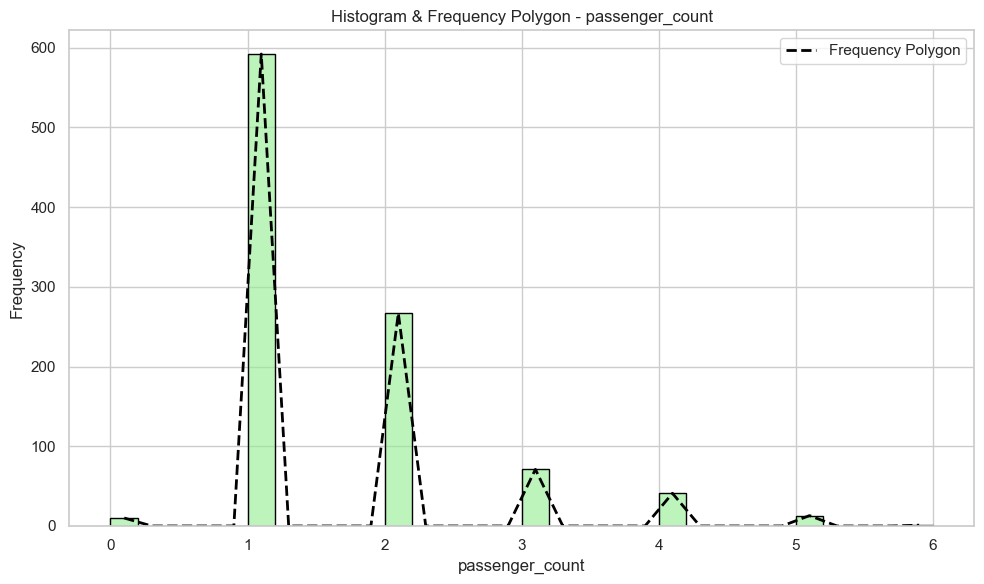

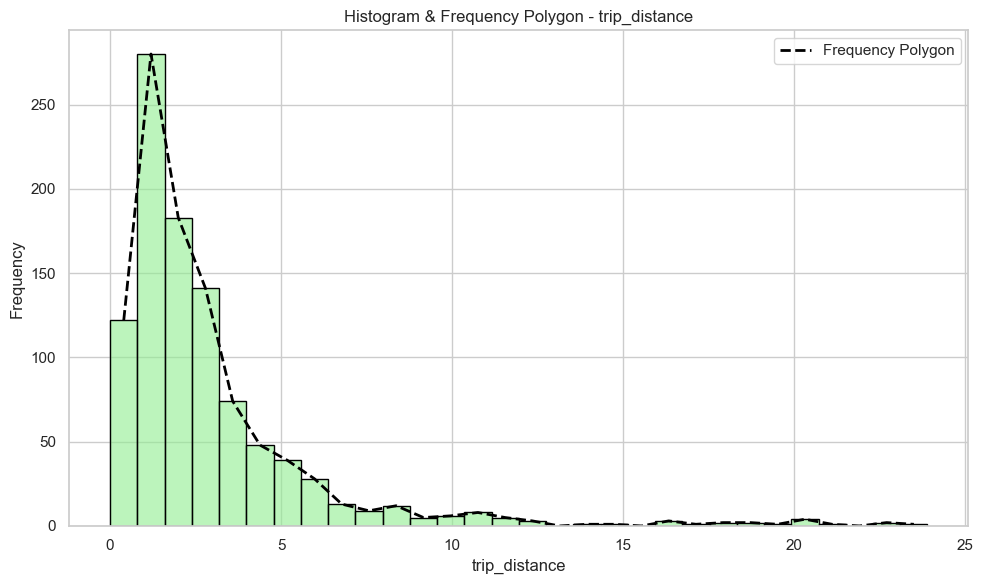

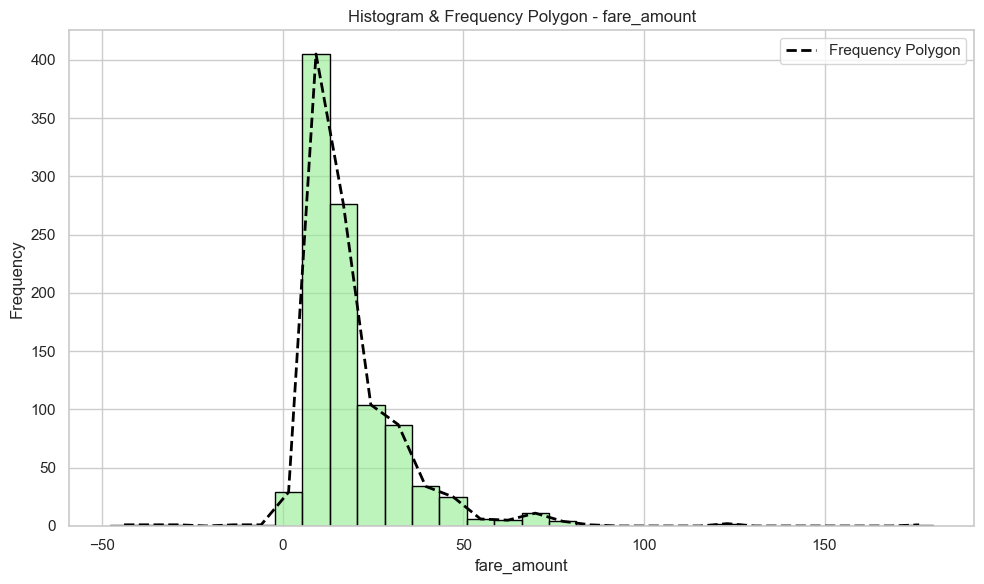

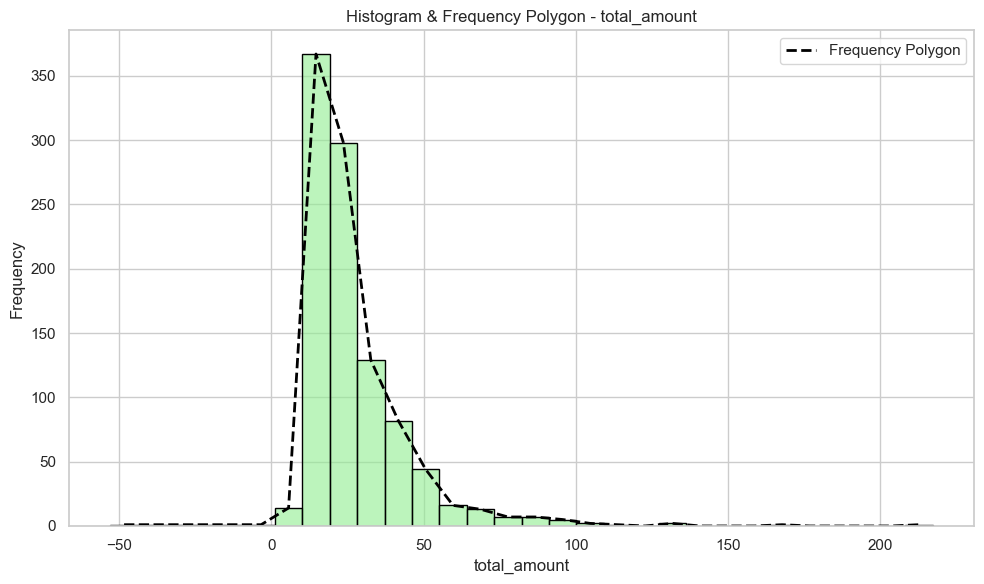

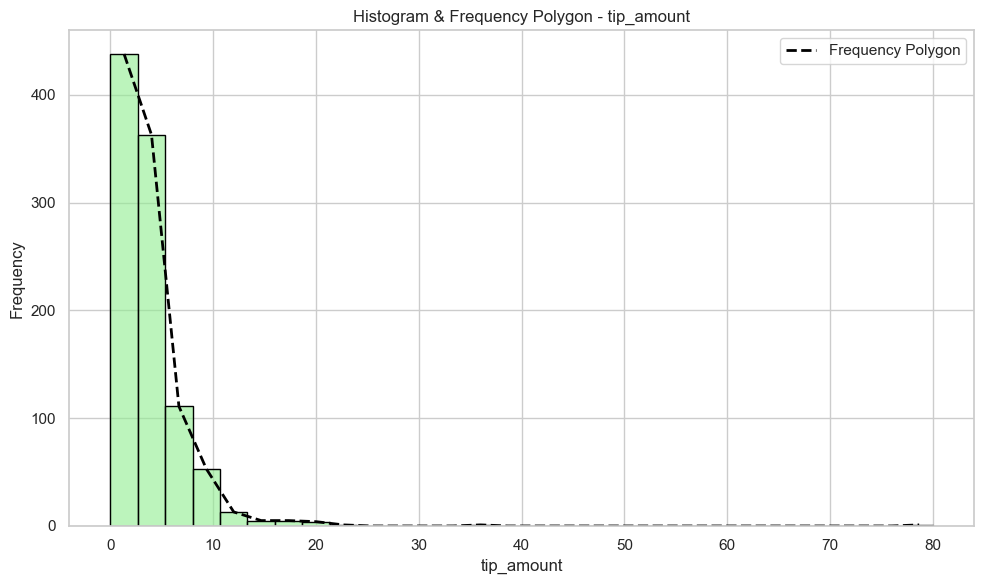

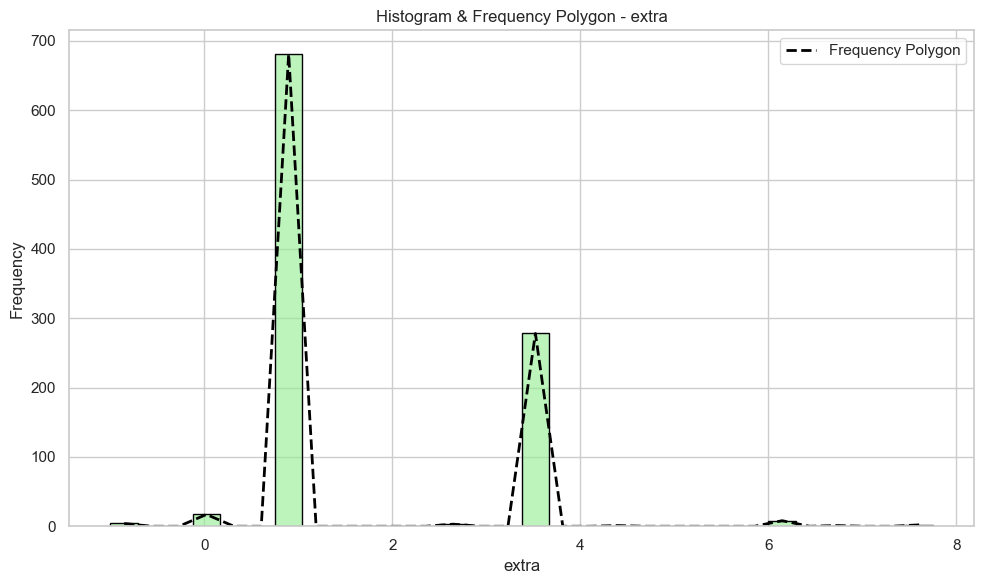

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

for col in cols:
    data = df[col].dropna()
  
    counts, bin_edges = np.histogram(data, bins=30)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    plt.figure(figsize=(10, 6))

    sns.histplot(data, bins=30, kde=False, color='lightgreen', edgecolor='black', alpha=0.6)

    plt.plot(bin_centers, counts, color='black', linewidth=2, linestyle='--', label='Frequency Polygon')

    plt.title(f'Histogram & Frequency Polygon - {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    # plt.yscale('log')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Summary of Insights from Histograms & Frequency Polygons

The data reveals distinct patterns in taxi trip characteristics:

Passenger Behavior –
Most rides are solo trips, with 1 passenger dominating, followed by 2 passengers. Higher passenger counts are rare, and zero counts likely indicate data errors.

Trip Distances –
The majority of trips are short (under 3 miles), showing a strong preference for short urban travel. Long trips (>15 miles) are infrequent but present, suggesting occasional airport or intercity rides.

Fare & Total Amounts –
Both fare and total amounts are heavily concentrated between $5 and $25. A few extreme values suggest luxury or long-haul rides, while negative amounts indicate possible data anomalies or adjustments.

Tipping Trends –
Tips are generally low, with many rides having no tips at all. High tip values are rare and could reflect exceptional service or incorrect entries.

Extra Charges –
Extras appear to be fixed-fee categories, with common values around $0.5 and $3.5, likely representing standard surcharges such as night or airport fees.

Overall Pattern –
The dataset shows a strong skew toward short, low-cost, single-passenger trips, with occasional outliers in distance, fare, and tips. The presence of negative and extreme values indicates a need for data cleaning before detailed modeling or forecasting.

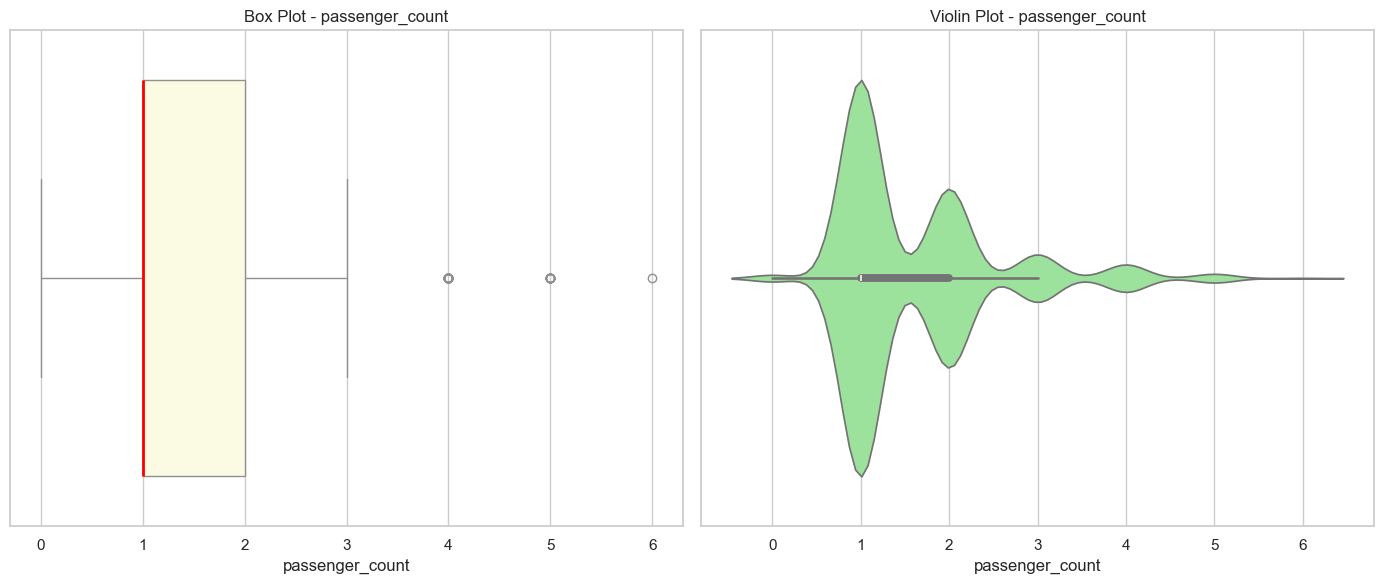

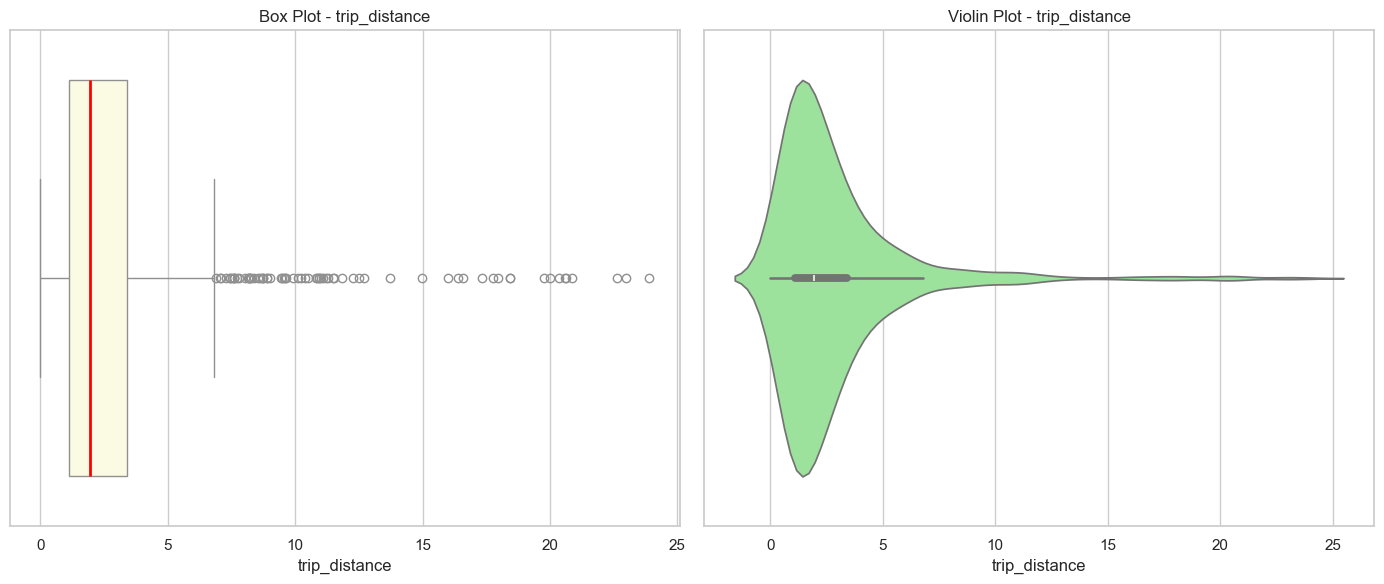

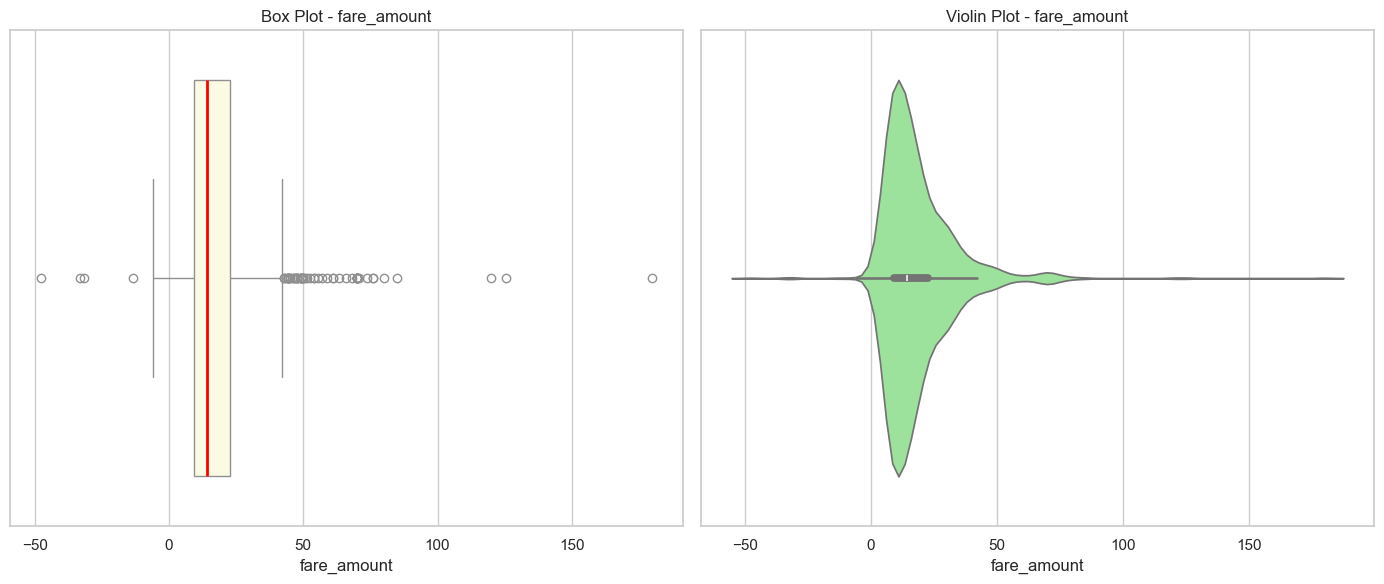

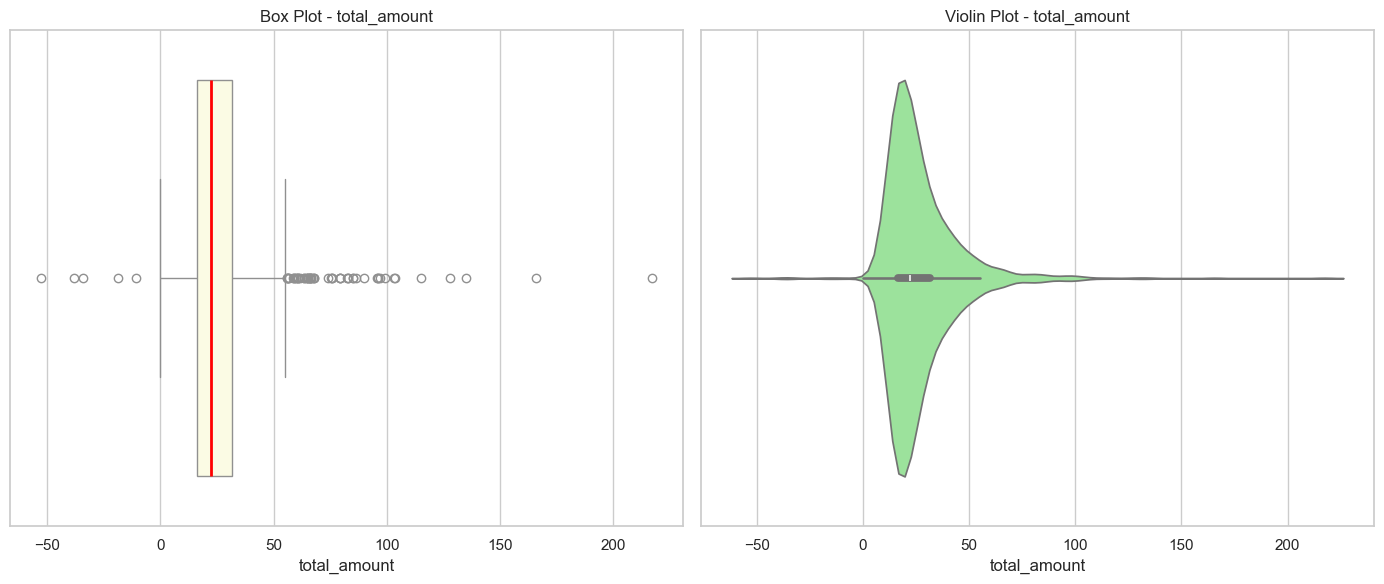

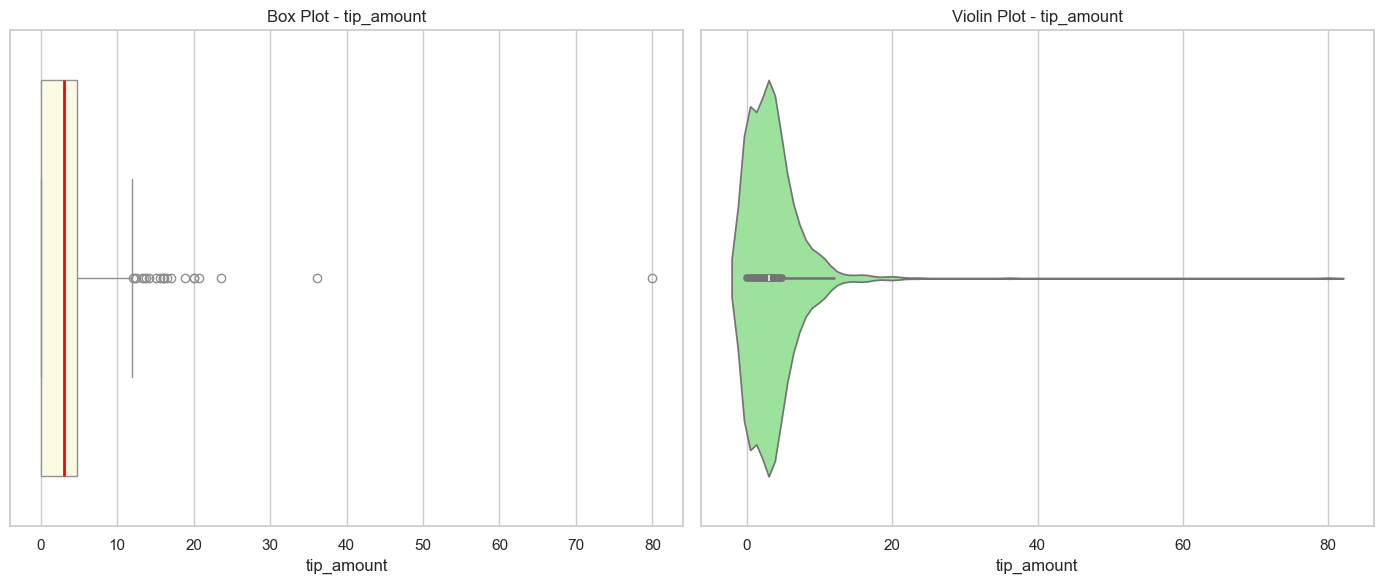

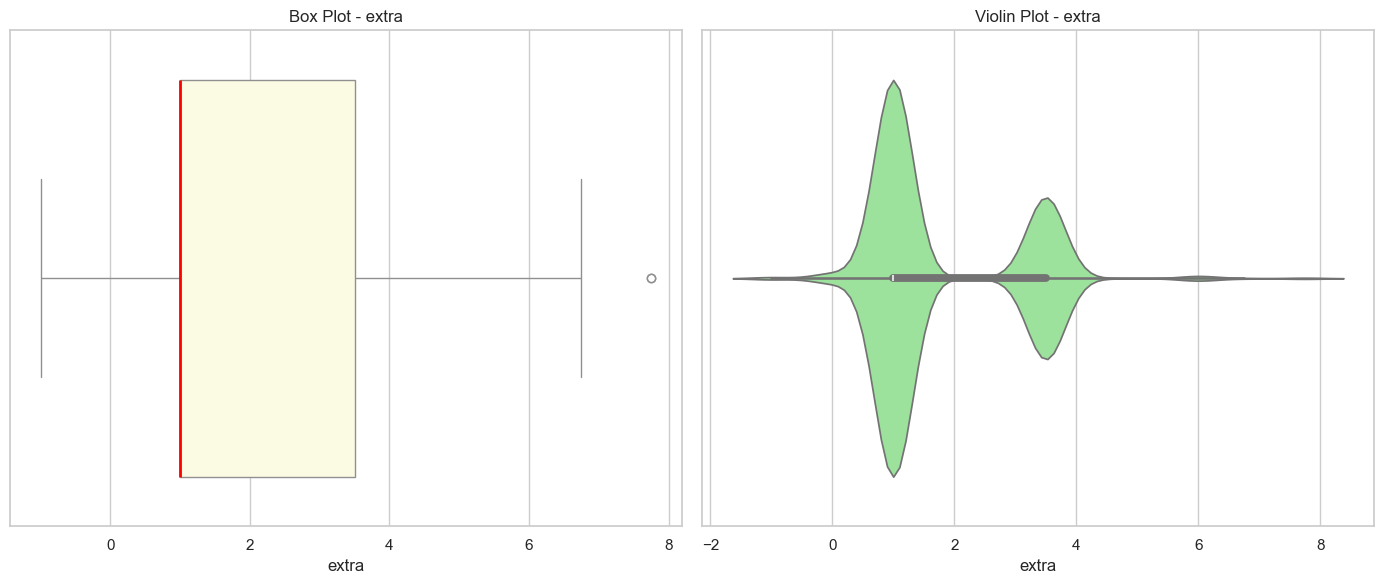

In [6]:
for col in cols:
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col], color='lightyellow',medianprops=dict(color='red', linewidth=2))
    plt.title(f'Box Plot - {col}')
    
    plt.subplot(1, 2, 2)
    sns.violinplot(x=df[col], color='lightgreen')
    plt.title(f'Violin Plot - {col}')
    plt.tight_layout()
    plt.show()

Insights from Boxplots & Violin Plots

1.Fare Amount

Most fares are tightly clustered in a low range.

Several high outliers — likely long trips, premium services, or data errors.

2.Tip Amount

Distribution is heavily skewed toward zero.

A few large tips stand out, possibly for exceptional service or input anomalies.

3.Trip Distance

Majority of trips are short (urban travel).

Long-distance outliers may indicate airport rides or intercity trips.

4.Trip Duration

Most trips are short in time.

Some extreme durations could be due to traffic jams, detours, or faulty GPS/timestamps.

5.Average Speed

Central tendency aligns with city driving speeds.

A few unrealistically high values suggest data entry/calculation issues.

5.Total Amount

Mirrors fare amount distribution but slightly higher due to tips & extras.

Extreme high values match the same outlier pattern seen in fare and distance.

| Variable          | Lower Whisker | Q1 (25%) | Median (50%) | Upper Whisker |
| ----------------- | ------------- | -------- | ------------ | ------------- |
| **Fare Amount**   | \~2           | \~7      | \~10         | \~25          |
| **Tip Amount**    | 0             | \~0      | \~2          | \~6           |
| **Total Amount**  | \~3           | \~9      | \~13         | \~28          |
| **Trip Distance** | \~0.5         | \~1      | \~2          | \~6           |
| **Extra**         | 0             | 0        | 0.5          | \~1.5         |
| **Tolls Amount**  | 0             | 0        | 0            | \~5           |



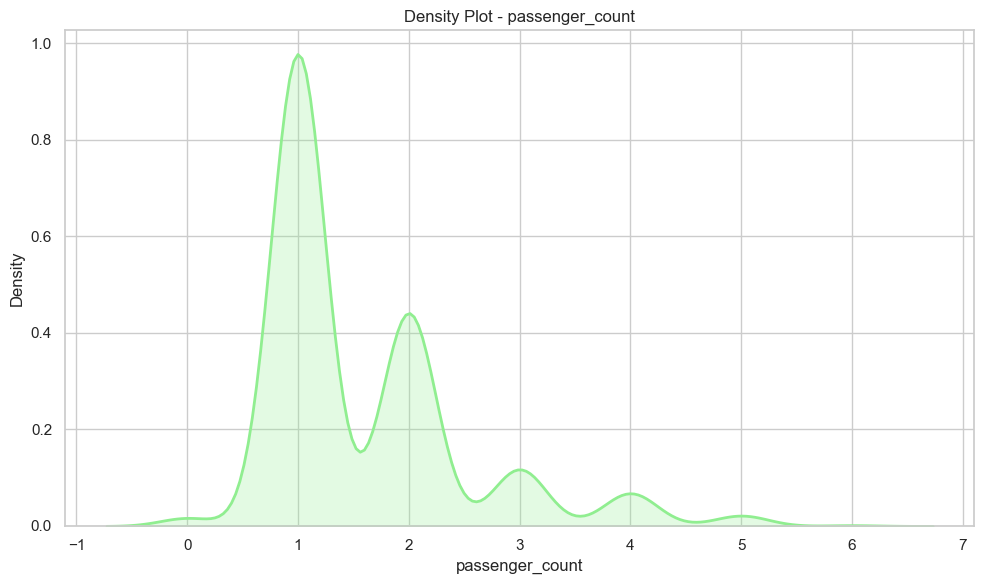

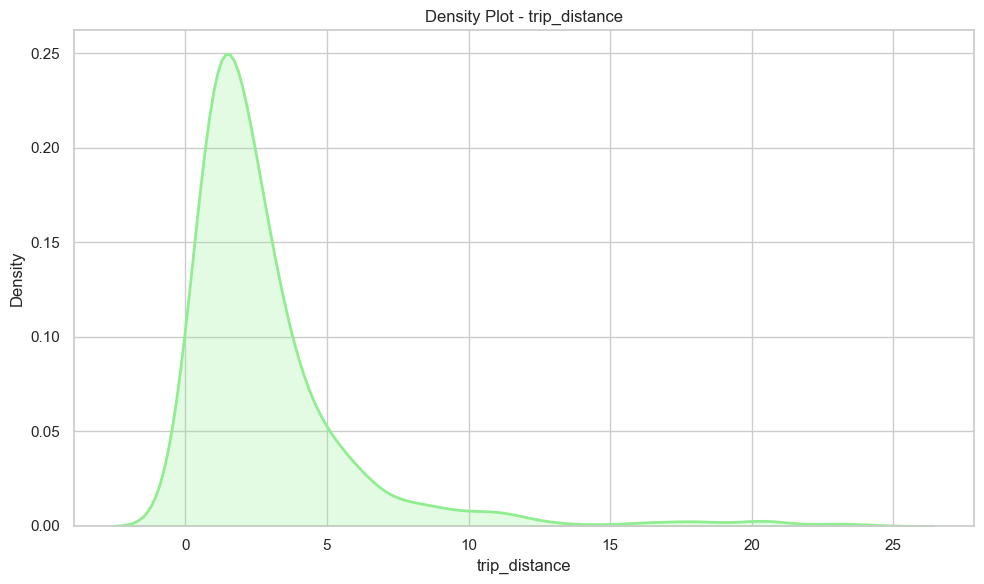

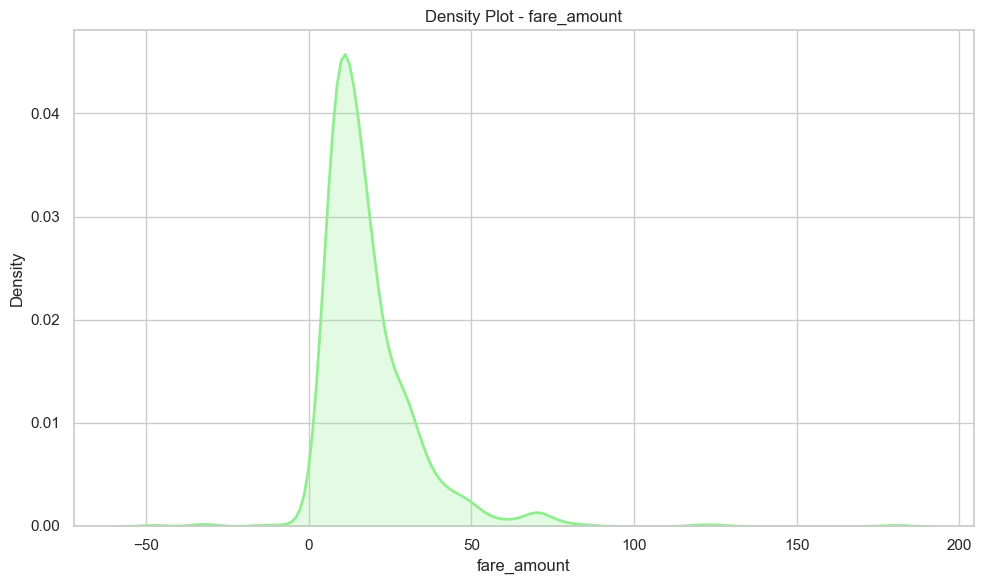

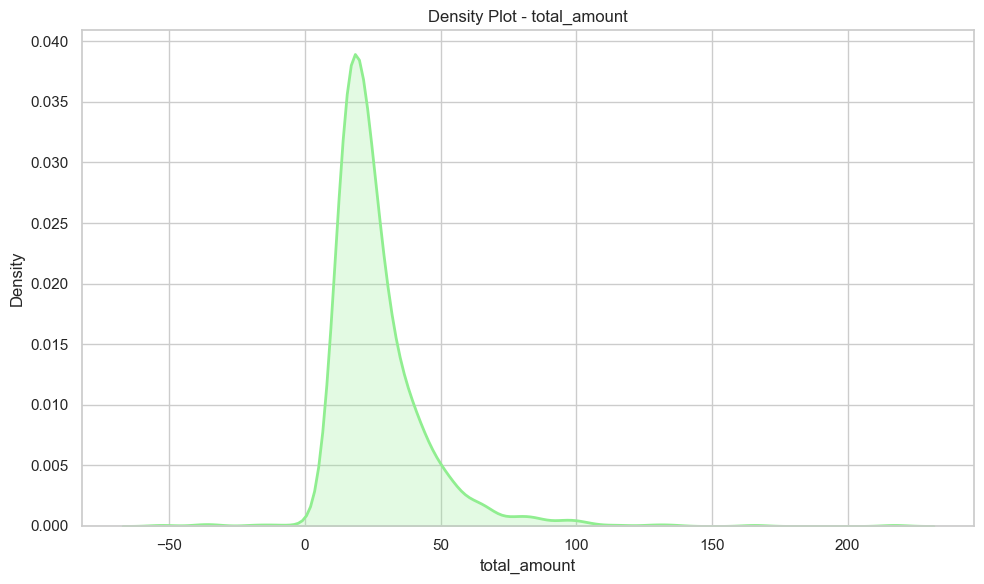

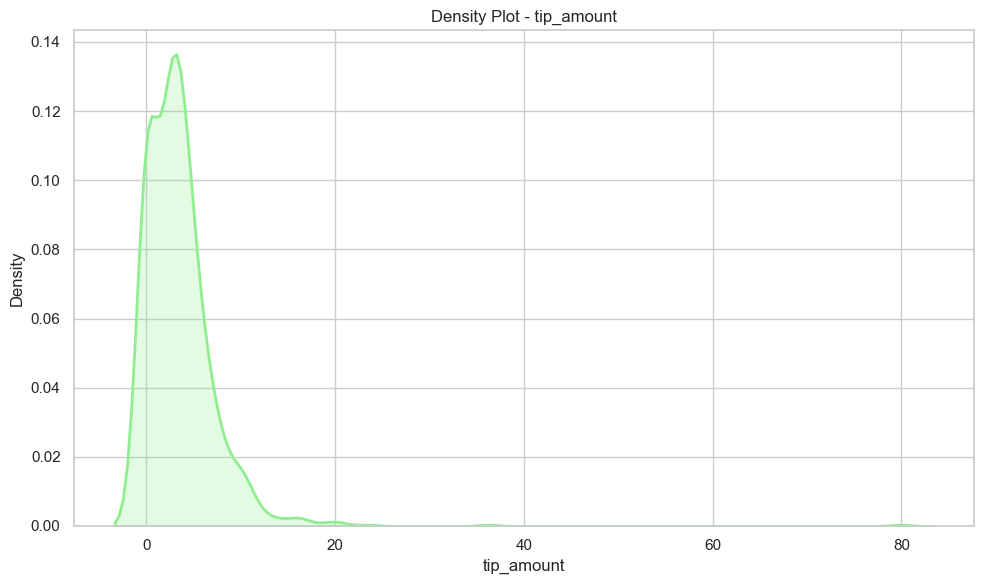

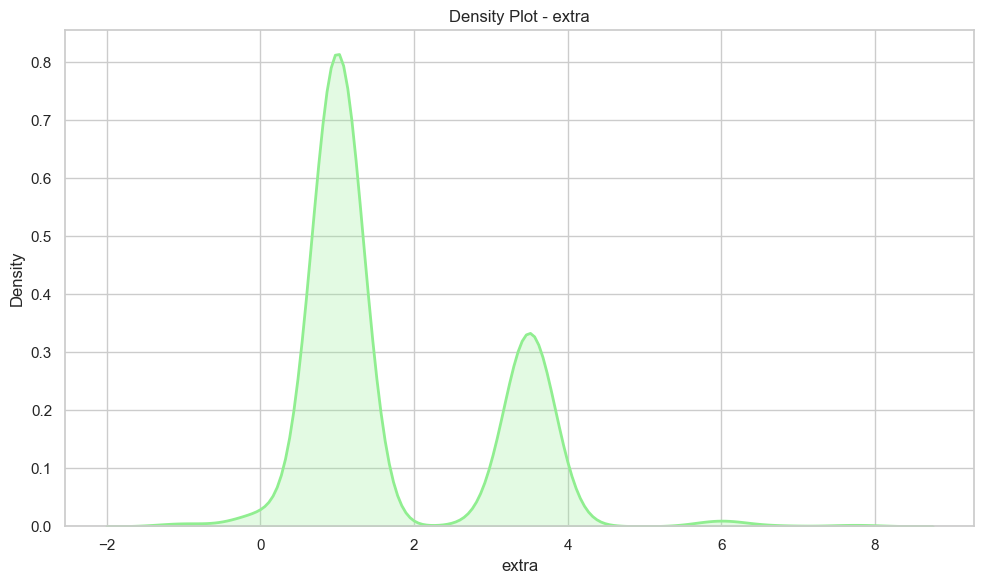

In [7]:
for col in cols:
    plt.figure(figsize=(10, 6))
    # sns.kdeplot(df[col], color='blue', fill=True, bw_adjust=0.5, linewidth=2)
    sns.kdeplot(df[col], color='lightgreen', fill=True, bw_method='silverman', linewidth=2)
    plt.title(f'Density Plot - {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [8]:
# Group smaller categories together

# categories = ['payment_type', 'RatecodeID']
# info = df[categories].dropna()

# for cat in categories:
#     # Group rare categories: keep only top 5 most frequent
#     top_cats = info[cat].value_counts().nlargest(3).index
#     info[cat + '_cleaned'] = info[cat].apply(lambda x: x if x in top_cats else 'Other')

#     plt.figure(figsize=(10, 6))
#     ax = sns.countplot(x=cat + '_cleaned', hue=cat + '_cleaned', data=info, palette='muted', edgecolor='black', legend=False)
#     plt.title(f'Count Plot (Top 5 + Other) - {cat}')
#     plt.xlabel(cat)
#     plt.ylabel('Count')
#     plt.yscale('log')
#     plt.grid(True, axis='y')

#     # Add value labels on bars
#     for container in ax.containers:
#         ax.bar_label(container, padding=3, fontsize=10)

#     plt.tight_layout()
#     plt.show()


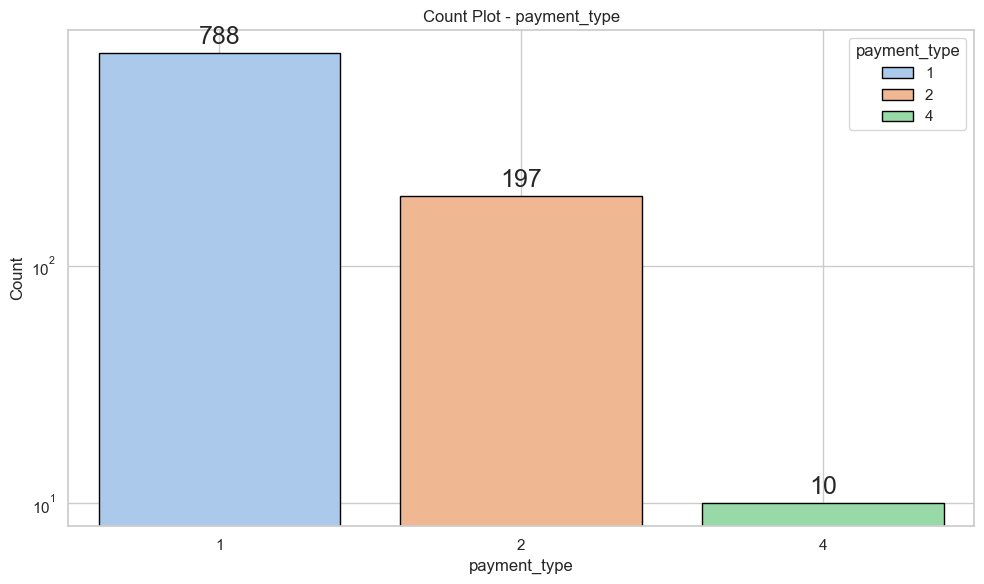

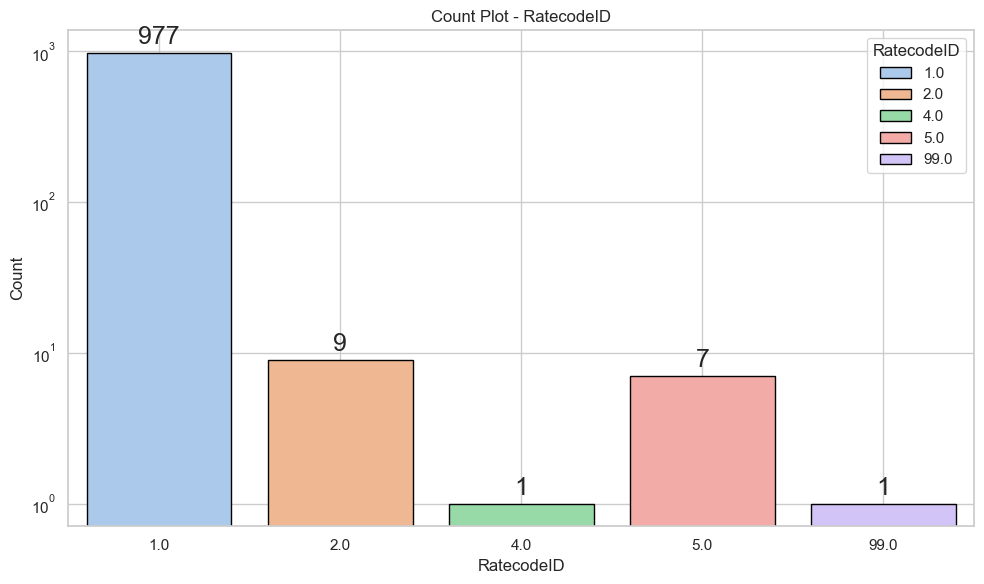

In [9]:
categories = ['payment_type','RatecodeID']
info = df[categories].dropna()
for cat in categories:
    plt.figure(figsize=(10, 6))  
    ax=sns.countplot(x=cat, hue=cat, data = info, palette='pastel', edgecolor='black')
    plt.title(f'Count Plot - {cat}')
    plt.xlabel(cat)
    plt.ylabel('Count')
    plt.yscale('log')
    plt.grid(True)
    for container in ax.containers:
        ax.bar_label(container, padding=3, fontsize=18)
    plt.tight_layout()
    plt.show()
    

1. Payment Type Distribution

--Payment type 1 (likely Credit Card) dominates with 788 trips, making up the large majority of transactions.

--Payment type 2 (likely Cash) is the second most common with 197 trips.

--Payment type 4 (possibly Dispute or No-charge) is extremely rare with only 10 trips.

--Scale note: The y-axis is in logarithmic scale, so even small differences visually are large in absolute numbers.

--Implication:
    -Digital (card-based) payments are the primary method.
    -Cash is still significant but much less common.
    -Other payment methods are negligible.

2. Rate Code ID Distribution

--RatecodeID 1.0 (likely Standard Rate) is overwhelmingly common with 977 trips — this is the default pricing.

--RatecodeID 2.0 (possibly JFK Flat Fare) — only 9 trips.

--RatecodeID 5.0 (possibly Negotiated fare) — 7 trips.

==RatecodeID 4.0 (possibly Group Ride) and RatecodeID 99.0 (unknown/other) — 1 trip each.

--Implication:
    -Almost all rides use the standard fare structure.
    -Special fare types are very rare, indicating low usage of special routes or negotiated pricing.

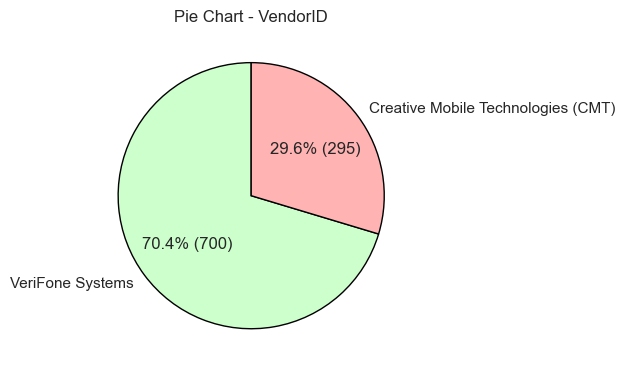

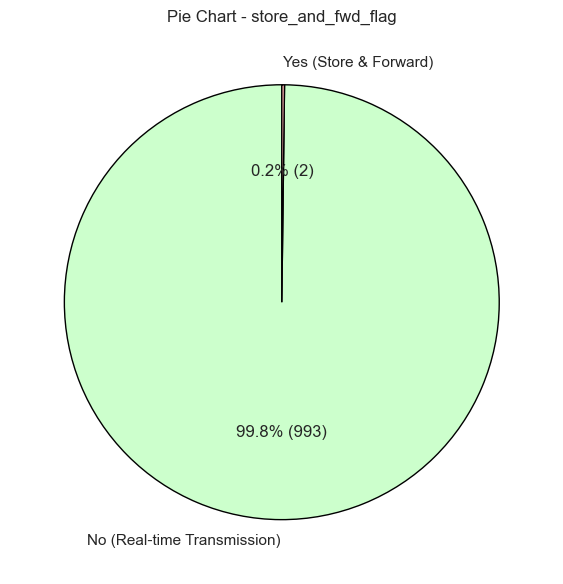

In [10]:
# Mapping dictionaries
vendor_map = {
    1: "Creative Mobile Technologies (CMT)",
    2: "VeriFone Systems"
}

store_fwd_map = {
    "Y": "Yes (Store & Forward)",
    "N": "No (Real-time Transmission)"
}

# Pie charts for VendorID and store_and_fwd_flag
cat_cols = ['VendorID', 'store_and_fwd_flag']

for col in cat_cols:
    plt.figure(figsize=(6, 6))
    
    # Apply mapping if column matches
    if col == 'VendorID':
        counts = df[col].map(vendor_map).value_counts(dropna=False)
    elif col == 'store_and_fwd_flag':
        counts = df[col].map(store_fwd_map).value_counts(dropna=False)
    else:
        counts = df[col].value_counts(dropna=False)
    
    labels = counts.index.astype(str)
    
    # Show both percentage and counts

    colors = ["#ccffcc", "#ffb3b3"] 


    plt.pie(
        counts,
        labels=labels,
        autopct=lambda p: f'{p:.1f}% ({int(round(p/100*counts.sum()))})',
        startangle=90,
        colors= colors,
        wedgeprops={'edgecolor': 'black'}
    )
    
    plt.title(f'Pie Chart - {col}')
    plt.tight_layout()
    plt.show()


1. VendorID Distribution

--VeriFone Systems handled 700 trips (70.4%).

--Creative Mobile Technologies (CMT) handled 295 trips (29.6%).

--VeriFone Systems has more than double the share of CMT.

--Indicates market dominance of VeriFone in this dataset.

2. Store and Forward Flag

--No (Real-time Transmission): 993 trips (99.8%).

--Yes (Store & Forward): 2 trips (0.2%).

--Real-time data transmission is the standard mode for almost all trips.

--Store & Forward occurs rarely, likely due to temporary network unavailability (e.g., tunnels, coverage gaps).

--High real-time share suggests strong network connectivity during trips

In [11]:
def mean_ci_95(series):
    x = series.dropna()
    n = int(len(x))
    mean = x.mean()
    sd = x.std(ddof=1)
    se = sd / sqrt(n) if n > 0 else np.nan
    tcritical = stats.t.ppf(0.975, df=n-1) if n > 1 else np.nan
    lo = mean - tcritical * se if n > 1 else np.nan
    hi = mean + tcritical * se if n > 1 else np.nan
    return pd.Series({
        "n": n,
        "mean": mean,
        "std": sd,
        "se": se,
        "ci_low": lo,
        "ci_high": hi
    })

target_cols = ['trip_distance', 'fare_amount', 'tip_amount']
ci_table = pd.DataFrame({col: mean_ci_95(df[col]) for col in target_cols}).T.round(3)

# Ensure n is integer
ci_table["n"] = ci_table["n"].astype(int)

print("95% Confidence Intervals:")
display(ci_table)


95% Confidence Intervals:


,n,mean,std,se,ci_low,ci_high
trip_distance,995,2.890,3.125,0.099,2.696,3.085
fare_amount,995,18.279,14.916,0.473,17.351,19.207
tip_amount,995,3.483,4.196,0.133,3.222,3.744


In [12]:
# One-sample t-test for tip amount against $2
tip = df["tip_amount"].dropna()
t_stat, p_val = stats.ttest_1samp(tip, popmean=2.0)

print("One-sample t-test (tip vs $2)")
print(f"Mean tip: {tip.mean():.2f}, t={t_stat:.4f}, p={p_val:.6f}",'\n\n\n')



# Two-sample t-test for fare amount by payment type
credit = df.loc[df["payment_type"] == 1, "fare_amount"].dropna()
cash = df.loc[df["payment_type"] == 2, "fare_amount"].dropna()

# Welch's t-test (does not assume equal variances)
t_stat, p_val = stats.ttest_ind(credit, cash, equal_var=False)

print("\nTwo-sample t-test (fare: Credit vs Cash)")
print(f"Credit mean: {credit.mean():.2f} (n={len(credit)})")
print(f"Cash mean:   {cash.mean():.2f} (n={len(cash)})")
print(f"t={t_stat:.4f}, p={p_val:.6f}",'\n\n\n')




ct = pd.crosstab(df["payment_type"], df["RatecodeID"])

# Chi-square test
chi2, p_val, dof, expected = stats.chi2_contingency(ct, correction=False)

print("\nChi-square Test (payment_type vs RatecodeID)")
print(f"Chi2 = {chi2:.4f}, dof = {dof}, p = {p_val:.6f}")
print("\nContingency Table (Observed):")
print(ct)



One-sample t-test (tip vs $2)
Mean tip: 3.48, t=11.1509, p=0.000000 




Two-sample t-test (fare: Credit vs Cash)
Credit mean: 18.47 (n=788)
Cash mean:   18.16 (n=197)
t=0.2472, p=0.804947 




Chi-square Test (payment_type vs RatecodeID)
Chi2 = 6.8535, dof = 8, p = 0.552523

Contingency Table (Observed):
RatecodeID    1.0   2.0   4.0   5.0   99.0
payment_type                              
1              776     7     0     4     1
2              191     2     1     3     0
4               10     0     0     0     0


1. One-sample t-test (Tip vs $2)

--Mean tip: $3.48, which is significantly higher than $2.

--t = 11.1509, p < 0.000001 → Highly significant difference.

--Interpretation: On average, customers tip much more than $2. The difference is not due to random chance.

2. Two-sample t-test (Fare: Credit vs Cash)

--Credit mean fare: $18.47 (n=788).

--Cash mean fare: $18.16 (n=197).

--t = 0.2472, p = 0.8049 → Not statistically significant.

--Interpretation: There’s no meaningful difference between fares paid by credit vs cash. The small observed difference is likely due to random variation.

3. Chi-square Test (Payment type vs RatecodeID)

--Chi² = 6.8535, df = 8, p = 0.5525 → Not statistically significant.

--Interpretation: The distribution of RatecodeIDs does not depend on the payment type. Rate codes are used similarly across different payment methods.

--From the contingency table:

    -Most trips have RatecodeID = 1.0 regardless of payment type.

    -Rare RatecodeIDs (4.0, 5.0, 99.0) occur very infrequently for any payment type.


Pearson correlation (trip_distance vs fare_amount): r = 0.8017
Spearman correlation (trip_distance vs fare_amount): rho = 0.8731

Pearson correlation (fare_amount vs tip_amount): r = 0.4931
Spearman correlation (fare_amount vs tip_amount): rho = 0.4165


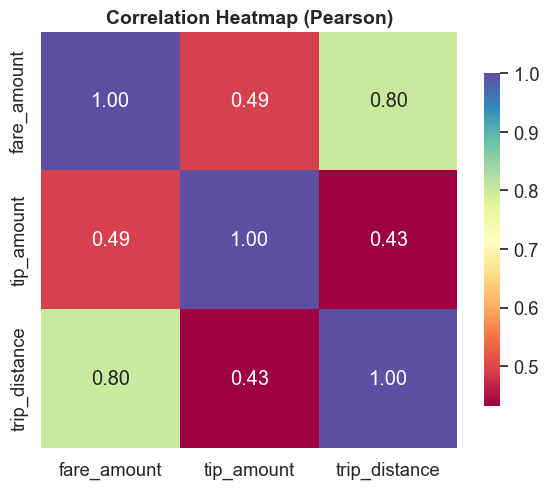

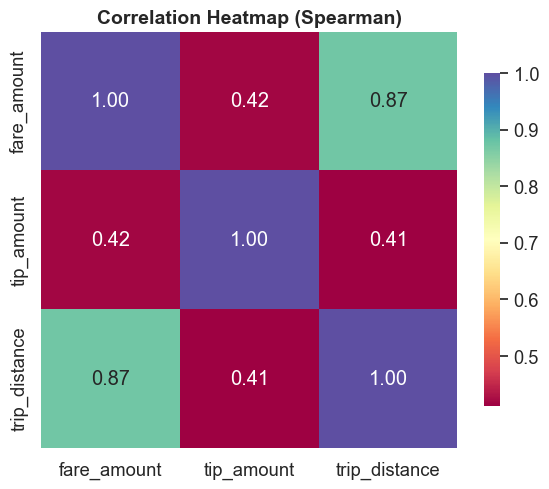

In [18]:
pairs = [
    ("trip_distance", "fare_amount"),
    ("fare_amount", "tip_amount")
]

for col1, col2 in pairs:
    pearson_r, pearson_p = stats.pearsonr(df[col1].dropna(), df[col2].dropna())
    spearman_rho, spearman_p = stats.spearmanr(df[col1], df[col2], nan_policy='omit')

    print(f"\nPearson correlation ({col1} vs {col2}): r = {pearson_r:.4f}")
    print(f"Spearman correlation ({col1} vs {col2}): rho = {spearman_rho:.4f}")

heatmap_cols = sorted({col for pair in pairs for col in pair})

sns.set(style="white", font_scale=1.2)

# Pearson heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(df[heatmap_cols].corr(method='pearson'),
            annot=True, fmt=".2f", cmap="Spectral", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap (Pearson)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# Spearman heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(df[heatmap_cols].corr(method='spearman'),
            annot=True, fmt=".2f", cmap="Spectral", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap (Spearman)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


4. Correlation Analysis
Pearson (linear relationships)

--Trip distance ↔ Fare amount: r = 0.80 → Strong positive linear correlation; longer trips cost more.

--Fare amount ↔ Tip amount: r = 0.49 → Moderate positive correlation; higher fares tend to get higher tips.



Spearman (monotonic relationships)

--Trip distance ↔ Fare amount: ρ = 0.87 → Very strong monotonic relationship; fare increases consistently with distance.

--Fare amount ↔ Tip amount: ρ = 0.42 → Moderate monotonic relationship; trend holds but with more variability.

In [19]:
# Convert to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Now extract hour counts sorted by hour
hour_counts = df['tpep_pickup_datetime'].dt.hour.value_counts().sort_index()
print(hour_counts)


tpep_pickup_datetime
0     989
1       3
23      3
Name: count, dtype: int64


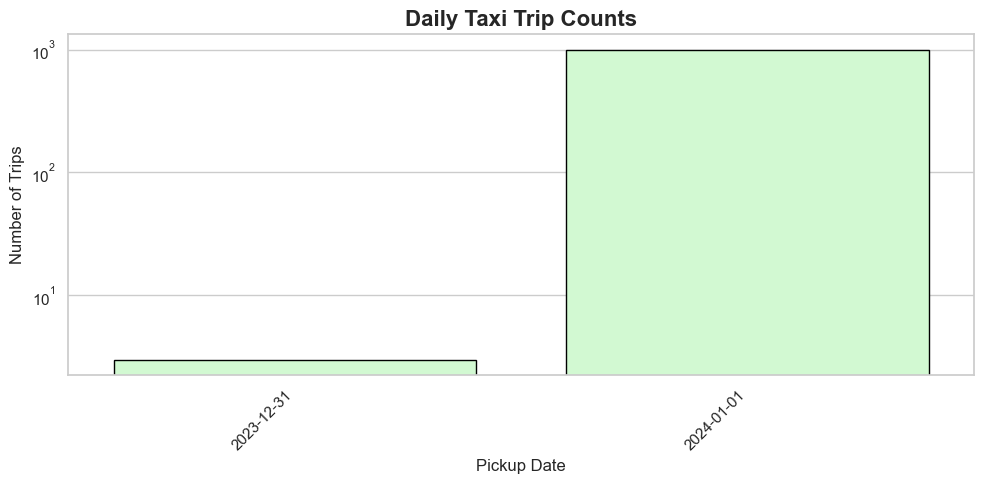

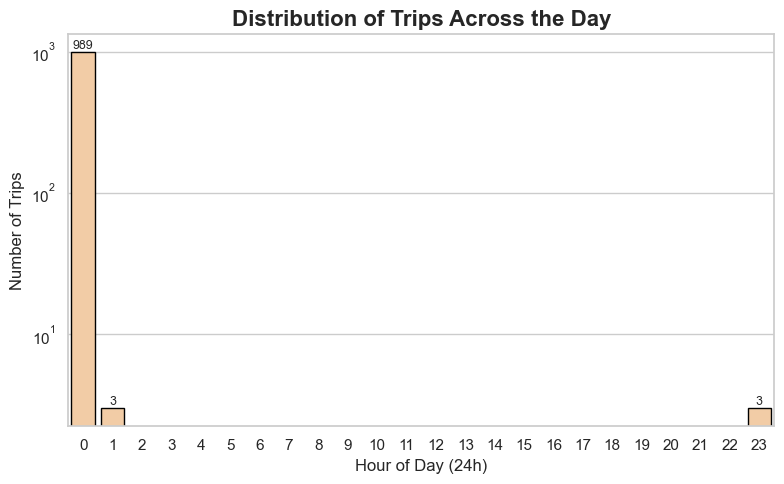

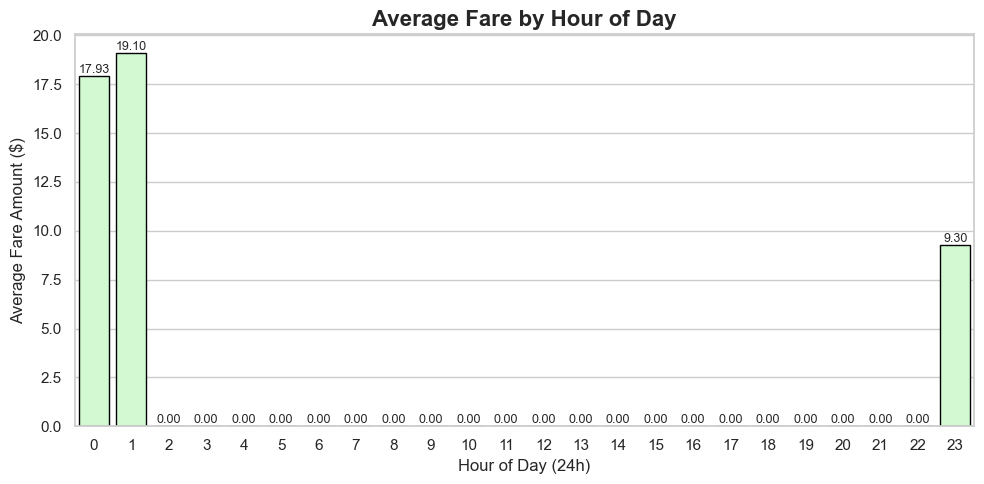

In [ ]:
# Convert pickup datetime column to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Extract hour for later tasks
df['hour'] = df['tpep_pickup_datetime'].dt.hour

sns.set_theme(style="whitegrid")


# Daily Trip Counts

daily_counts = (
    df.groupby(df['tpep_pickup_datetime'].dt.date)
      .size()
      .reset_index(name="Trips")
)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=daily_counts,
    x='tpep_pickup_datetime',
    y='Trips',
    color="#ccffcc",        
    edgecolor='black'
)
plt.title("Daily Taxi Trip Counts", fontsize=16, weight='bold')
plt.xlabel("Pickup Date", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  
plt.tight_layout()
plt.show()



# Trips by Hour of Day

hourly_counts = df['hour'].value_counts().sort_index().reindex(range(24), fill_value=0).reset_index()
hourly_counts.columns = ['hour', 'Trips']

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=hourly_counts,
    x='hour',
    y='Trips',
    color="#ffcc99",      
    edgecolor='black'
)
plt.title("Distribution of Trips Across the Day", fontsize=16, weight='bold')
plt.xlabel("Hour of Day (24h)", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.xticks(range(0, 24))
plt.yscale('log') 

# for p in ax.patches:
#     height = p.get_height()
#     ax.annotate(f'{int(height)}',
#                 (p.get_x() + p.get_width() / 2., height),
#                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



# Average Fare by Hour

filtered_df = df[df['fare_amount'] <= 100]

avg_fare_by_hour = (
    filtered_df.groupby('hour')['fare_amount']
    .mean()
    .reindex(range(24), fill_value=0)
    .reset_index()
)

plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=avg_fare_by_hour,
    x='hour',
    y='fare_amount',
    color="#ccffcc",        
    edgecolor='black'
)
plt.title("Average Fare by Hour of Day", fontsize=16, weight='bold')
plt.xlabel("Hour of Day (24h)", fontsize=12)
plt.ylabel("Average Fare Amount ($)", fontsize=12)
plt.xticks(range(0, 24))

# for p in ax.patches:
#     height = p.get_height()
#     ax.annotate(f'{height:.2f}',
#                 (p.get_x() + p.get_width() / 2., height),
#                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


1. Daily Taxi Trip Counts

--Dates Covered: Only two days are shown — 31st Dec 2023 and 1st Jan 2024.

--Observation:
    -31 Dec 2023 → Very few trips (around 2–3).
    -1 Jan 2024 → Drastically higher trips (close to 1000).

--Insight: Likely due to New Year celebrations — demand for taxis spikes massively right after midnight.


2. Distribution of Trips Across the Day

--Peak Hour: 0 (midnight to 1 AM) with 989 trips — matches the New Year timing.

--Low Activity Hours: Most hours have 0 trips.

--Small Peaks: Hour 1 and Hour 23 have 3 trips each.

--Overall Pattern: Trips are highly concentrated around midnight — suggesting event-driven demand, not regular daily traffic.

3. Average Fare by Hour of Day

--Hour 0: Average fare ≈ $17.93.

--Hour 1: Average fare ≈ $19.10 — slightly higher, possibly due to late-night surcharge or longer trips.

--Hour 23: Average fare ≈ $9.30 — lower, perhaps short trips before the New Year.

--Other Hours: No trips, hence fare = $0.

--Insight: Peak fares align with high-demand hours, consistent with New Year events.

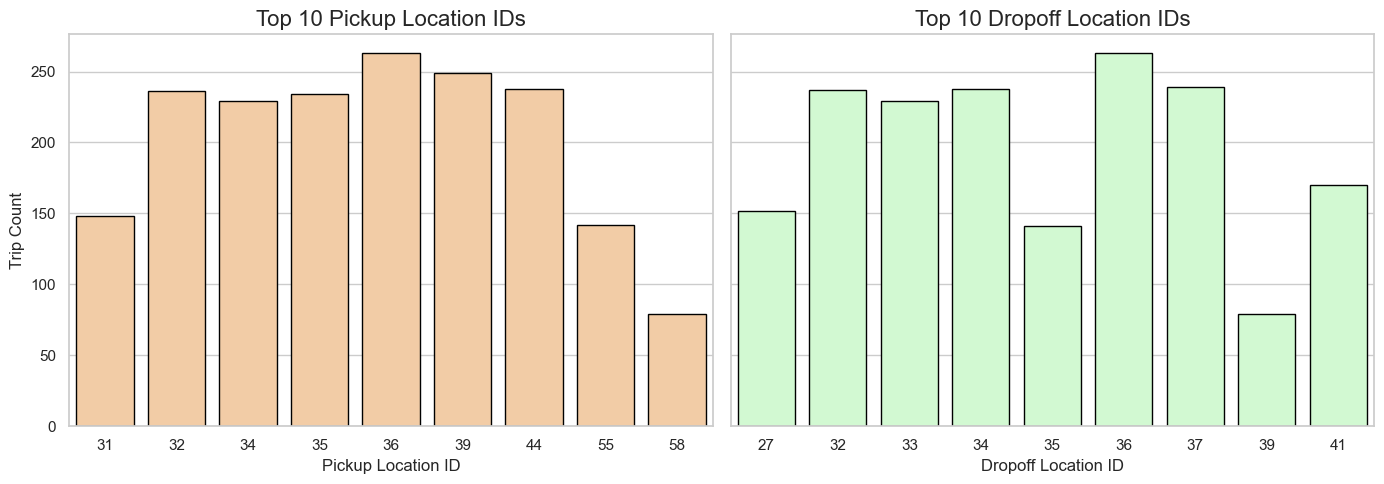

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 pickup and dropoff zone IDs (numeric)
top_pu = df['PULocationID'].value_counts().head(10)
top_do = df['DOLocationID'].value_counts().head(10)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Pickup zones
sns.barplot(
    x=top_pu.values,
    y=top_pu.index,
    color="#ffcc99",
    ax=axes[0],
    errorbar=None,
    edgecolor='black'
)
axes[0].set_title("Top 10 Pickup Location IDs", fontsize=16)
axes[0].set_xlabel("Pickup Location ID")
axes[0].set_ylabel("Trip Count")

# Dropoff zones
sns.barplot(
    x=top_do.values,
    y=top_do.index,
    color="#ccffcc",
    ax=axes[1],
    errorbar=None,
    edgecolor='black'
)
axes[1].set_title("Top 10 Dropoff Location IDs", fontsize=16)
axes[1].set_xlabel("Dropoff Location ID")
axes[1].set_ylabel("Trip Count")

plt.tight_layout()
plt.show()


1. Pickup Locations

--Most Popular Pickup ID: 36 (~265 trips) — clearly the highest demand location.

--Other High Demand IDs: 35, 39, 32, and 44 — all above 230 trips.

--Least Popular in Top 10: 58 (~80 trips).

--Observation: Demand is heavily concentrated in a few central IDs, suggesting key transport hubs or busy city areas.


2. Dropoff Locations

--Most Popular Dropoff ID: 36 (~270 trips) — matches the top pickup spot, showing it’s both a major origin and destination.

--Other High Demand IDs: 32, 33, 34, and 37 — all above 225 trips.

--Least Popular in Top 10: 39 (~75 trips) — although 39 is high for pickups, it’s much lower for dropoffs, indicating it’s more of a starting point than an endpoint.


3. Key Insights

--ID 36 dominance: This location is central for both pickups and dropoffs — possibly a major city hub, airport, or entertainment district.

--Mismatch in pickup vs. dropoff rankings:
    -Example: ID 39 is high for pickups but low for dropoffs.
    -Example: ID 27 appears in dropoffs but not in pickups, meaning it’s more of a destination.

--Potential operational focus: Taxi availability could be optimized around IDs 36, 35, and 32 to meet high demand.